### Loading useful Modules

In [220]:
import pandas as pd
from scipy.io import arff
import numpy as np
import math
import operator
import seaborn as sns

### Loading Train and Test Datasets

In [221]:
data=arff.loadarff("./product-selection/trainProdSelection.arff")
trainDF = pd.DataFrame(data[0])
data=arff.loadarff("./product-selection/testProdSelection.arff")
testDF = pd.DataFrame(data[0])

### Understanding Data

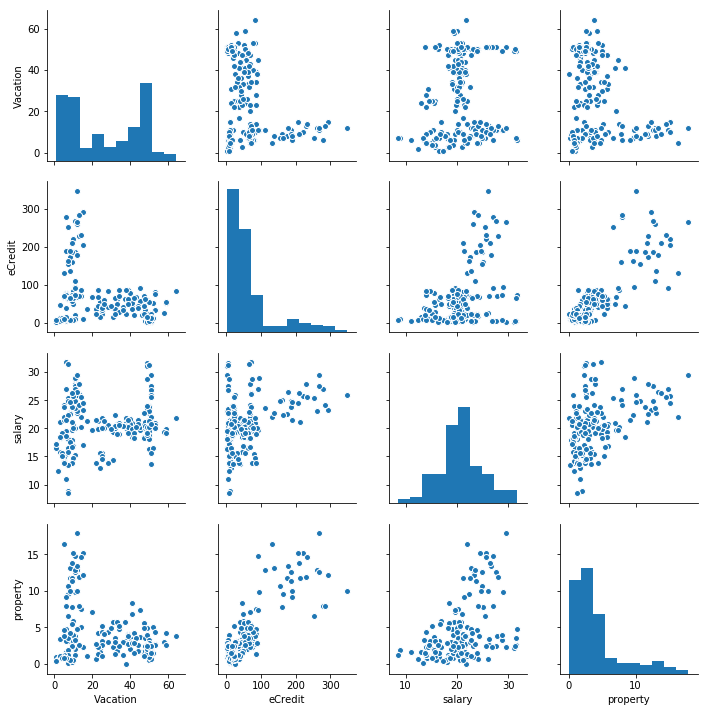

In [222]:
sns.pairplot(trainDF)

### Encoding string based series in Training and Test Sets  to UTF-8


In [223]:
trainDF.LifeStyle=trainDF.LifeStyle.str.decode("UTF-8")

In [224]:
trainDF.Type=trainDF.Type.str.decode("UTF-8")

In [225]:
trainDF.label=trainDF.label.str.decode("UTF-8")

In [226]:
testDF.LifeStyle=testDF.LifeStyle.str.decode("UTF-8")

In [227]:
testDF.Type=testDF.Type.str.decode("UTF-8")

In [228]:
testDF.label=testDF.label.str.decode("UTF-8")

## One hot Encoding

In [229]:
trainDF_dummy = pd.get_dummies(trainDF[['Type','LifeStyle']],drop_first=True)

In [230]:
trainDF_dummy.head()

,Type_engineer,Type_librarian,Type_professor,Type_student,LifeStyle_spend<saving,LifeStyle_spend>>saving,LifeStyle_spend>saving
0,0,0,0,1,0,0,1
1,0,0,0,1,0,0,1
2,0,0,0,1,0,0,1
3,0,0,0,1,0,0,1
4,0,0,0,1,0,0,1


In [231]:
train_Final = pd.concat([trainDF,trainDF_dummy],axis=1)

In [232]:
train_Final = train_Final.drop(['Type','LifeStyle'],axis=1)

In [233]:
train_Final.head()

,Vacation,eCredit,salary,property,label,Type_engineer,Type_librarian,Type_professor,Type_student,LifeStyle_spend<saving,LifeStyle_spend>>saving,LifeStyle_spend>saving
0,6.0,40.0,13.62,3.2804,C1,0,0,0,1,0,0,1
1,11.0,21.0,15.32,2.0232,C1,0,0,0,1,0,0,1
2,7.0,64.0,16.55,3.1202,C1,0,0,0,1,0,0,1
3,3.0,47.0,15.71,3.4022,C1,0,0,0,1,0,0,1
4,15.0,10.0,16.96,2.2825,C1,0,0,0,1,0,0,1


In [234]:
train_Final = train_Final[[c for c in train_Final if c not in ['label']] + ['label']]

In [235]:
train_Final.head()

,Vacation,eCredit,salary,property,Type_engineer,Type_librarian,Type_professor,Type_student,LifeStyle_spend<saving,LifeStyle_spend>>saving,LifeStyle_spend>saving,label
0,6.0,40.0,13.62,3.2804,0,0,0,1,0,0,1,C1
1,11.0,21.0,15.32,2.0232,0,0,0,1,0,0,1,C1
2,7.0,64.0,16.55,3.1202,0,0,0,1,0,0,1,C1
3,3.0,47.0,15.71,3.4022,0,0,0,1,0,0,1,C1
4,15.0,10.0,16.96,2.2825,0,0,0,1,0,0,1,C1


In [236]:
testDF_dummy = pd.get_dummies(testDF[['Type','LifeStyle']],drop_first=True)

In [237]:
testDF_dummy.head()

,Type_engineer,Type_librarian,Type_professor,Type_student,LifeStyle_spend<saving,LifeStyle_spend>>saving,LifeStyle_spend>saving
0,0,0,0,1,1,0,0
1,0,0,0,1,0,1,0
2,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1
4,0,1,0,0,1,0,0


In [238]:
test_Final = pd.concat([testDF,testDF_dummy],axis=1)

In [239]:
test_Final = test_Final.drop(['Type','LifeStyle'],axis=1)

In [240]:
test_Final.head()

,Vacation,eCredit,salary,property,label,Type_engineer,Type_librarian,Type_professor,Type_student,LifeStyle_spend<saving,LifeStyle_spend>>saving,LifeStyle_spend>saving
0,12.0,19.0,14.7900,3.7697,C1,0,0,0,1,1,0,0
1,29.0,10.0,16.1900,2.4839,C1,0,0,0,1,0,1,0
2,28.0,60.0,15.4600,1.1885,C1,0,0,0,1,0,0,0
3,15.0,41.0,21.2600,1.4379,C1,1,0,0,0,0,0,1
4,2.0,9.0,19.7207,0.6913,C1,0,1,0,0,1,0,0


In [241]:
test_Final = test_Final[[c for c in test_Final if c not in ['label']] + ['label']]

In [242]:
test_Final.head()

,Vacation,eCredit,salary,property,Type_engineer,Type_librarian,Type_professor,Type_student,LifeStyle_spend<saving,LifeStyle_spend>>saving,LifeStyle_spend>saving,label
0,12.0,19.0,14.7900,3.7697,0,0,0,1,1,0,0,C1
1,29.0,10.0,16.1900,2.4839,0,0,0,1,0,1,0,C1
2,28.0,60.0,15.4600,1.1885,0,0,0,1,0,0,0,C1
3,15.0,41.0,21.2600,1.4379,1,0,0,0,0,0,1,C1
4,2.0,9.0,19.7207,0.6913,0,1,0,0,1,0,0,C1


### Normalization

In [243]:
def Normalize(x):
    return((x-np.min(x))/(max(x)-min(x)))

In [244]:
train_Final.iloc[:,0:4] = train_Final.iloc[:,0:4].apply(Normalize)

In [245]:
test_Final.iloc[:,0:4] = test_Final.iloc[:,0:4].apply(Normalize)

In [246]:
train_Final.head()

,Vacation,eCredit,salary,property,Type_engineer,Type_librarian,Type_professor,Type_student,LifeStyle_spend<saving,LifeStyle_spend>>saving,LifeStyle_spend>saving,label
0,0.079365,0.107558,0.219960,0.183167,0,0,0,1,0,0,1,C1
1,0.158730,0.052326,0.293102,0.112797,0,0,0,1,0,0,1,C1
2,0.095238,0.177326,0.346023,0.174200,0,0,0,1,0,0,1,C1
3,0.031746,0.127907,0.309882,0.189984,0,0,0,1,0,0,1,C1
4,0.222222,0.020349,0.363663,0.127311,0,0,0,1,0,0,1,C1


In [247]:
test_Final.head()

,Vacation,eCredit,salary,property,Type_engineer,Type_librarian,Type_professor,Type_student,LifeStyle_spend<saving,LifeStyle_spend>>saving,LifeStyle_spend>saving,label
0,0.20,0.058824,0.104637,0.398926,0,0,0,1,1,0,0,C1
1,0.54,0.021008,0.175059,0.243041,0,0,0,1,0,1,0,C1
2,0.52,0.231092,0.138339,0.085992,0,0,0,1,0,0,0,C1
3,0.26,0.151261,0.430086,0.116229,1,0,0,0,0,0,1,C1
4,0.00,0.016807,0.352657,0.025714,0,1,0,0,1,0,0,C1


In [190]:
print(trainDF.describe())

         Vacation     eCredit      salary    property
count  186.000000  186.000000  186.000000  186.000000
mean    27.575269   62.661290   20.664772    4.141992
std     18.590530   68.953712    4.264905    3.766024
min      1.000000    3.000000    8.507600    0.008000
25%      9.000000   15.000000   18.523600    1.652375
50%     25.500000   44.500000   20.385000    2.898600
75%     48.000000   71.750000   22.787500    4.835500
max     64.000000  347.000000   31.750000   17.873700


In [248]:
trainDF = train_Final
testDF = test_Final



### Calculating Distance between two datapoints 


In [259]:
def eDistance(row1, row2, length):
    distance = 0
#     for i in range(2):
#         if (row1[i]==row2[i]):
#             distance += pow((1), 2)
    for x in range(0,length):
        distance += pow((row1[x] - row2[x]), 2)
    return math.sqrt(distance)

### Calculating the K nearest Neighbours for  a test data point using all train data points

In [260]:
def getNeighbors(trainSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainSet)):
        dist = eDistance(testInstance, trainSet[x], length)
        distances.append((trainSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

### Predicting Label from a set of nearest neighbours using Majority Voting


In [283]:
def predictLabelFrom(neighbors):
    votes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in votes:
            votes[response] += 1
        else:
            votes[response] = 1
    sortedVotes = sorted(votes.items(), key=operator.itemgetter(1),reverse=True)
#     e=sorted(votes.items(), key=lambda x: (x[1],x[0]), reverse=True)
#     d=pd.DataFrame(e)
#     dFilter=d[d[1]==d[1].max()]
#     fg = dFilter.sort_values(by = 0,ascending=True).head(1)
#     return fg[0].values[0]
    return sortedVotes[0][0]

### Calculating Accuracy, given predicted values and actual values

In [284]:
def Accuracy(testSet, predictedLabels):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictedLabels[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0


### KNN Algorithm Driver Function

In [285]:
def knn(k):
    predictedLabels=[]
    for x in range(len(testDF)):
        neighbors = getNeighbors(trainDF.values, testDF.values[x], k)
        result = predictLabelFrom(neighbors)
        predictedLabels.append(result)
        #print('> predicted=' + repr(result) + ', actual=' + repr(testDF.values[x][-1]))
    accuracy = Accuracy(testDF.values, predictedLabels)
    print('Accuracy: ' + repr(accuracy) + '%' + 'for k: ' +repr(k))
    return accuracy

In [286]:
knn(3)

Accuracy: 28.57142857142857%for k: 3


28.57142857142857

### Finding best K Value for Maximum Accuracy

In [287]:
import matplotlib.pyplot as plt
l=[]
val=[]
for i in range(3,100,2):
    l.append(knn(i))
    val.append(i)

Accuracy: 28.57142857142857%for k: 3
Accuracy: 28.57142857142857%for k: 5
Accuracy: 28.57142857142857%for k: 7
Accuracy: 23.809523809523807%for k: 9
Accuracy: 23.809523809523807%for k: 11
Accuracy: 23.809523809523807%for k: 13
Accuracy: 28.57142857142857%for k: 15
Accuracy: 28.57142857142857%for k: 17
Accuracy: 23.809523809523807%for k: 19
Accuracy: 23.809523809523807%for k: 21
Accuracy: 19.047619047619047%for k: 23
Accuracy: 19.047619047619047%for k: 25
Accuracy: 23.809523809523807%for k: 27
Accuracy: 19.047619047619047%for k: 29
Accuracy: 19.047619047619047%for k: 31
Accuracy: 19.047619047619047%for k: 33
Accuracy: 14.285714285714285%for k: 35
Accuracy: 14.285714285714285%for k: 37
Accuracy: 19.047619047619047%for k: 39
Accuracy: 23.809523809523807%for k: 41
Accuracy: 19.047619047619047%for k: 43
Accuracy: 19.047619047619047%for k: 45
Accuracy: 19.047619047619047%for k: 47
Accuracy: 19.047619047619047%for k: 49
Accuracy: 14.285714285714285%for k: 51
Accuracy: 19.047619047619047%for k

## Accuracy vs K

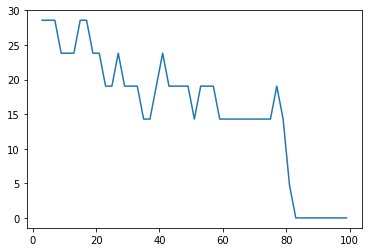

In [288]:
plt.plot(val,l)
plt.show()
# plot = pd.DataFrame(l,val,)

In [289]:
maxValueIndex=l.index(max(l))
maxAccuracy=l[maxValueIndex]
print ("Maximum Accuracy "+str(maxAccuracy)+ " occurs at "+str(maxValueIndex+3))

Maximum Accuracy 28.57142857142857 occurs at 3


In [290]:
l

[28.57142857142857,
 28.57142857142857,
 28.57142857142857,
 23.809523809523807,
 23.809523809523807,
 23.809523809523807,
 28.57142857142857,
 28.57142857142857,
 23.809523809523807,
 23.809523809523807,
 19.047619047619047,
 19.047619047619047,
 23.809523809523807,
 19.047619047619047,
 19.047619047619047,
 19.047619047619047,
 14.285714285714285,
 14.285714285714285,
 19.047619047619047,
 23.809523809523807,
 19.047619047619047,
 19.047619047619047,
 19.047619047619047,
 19.047619047619047,
 14.285714285714285,
 19.047619047619047,
 19.047619047619047,
 19.047619047619047,
 14.285714285714285,
 14.285714285714285,
 14.285714285714285,
 14.285714285714285,
 14.285714285714285,
 14.285714285714285,
 14.285714285714285,
 14.285714285714285,
 14.285714285714285,
 19.047619047619047,
 14.285714285714285,
 4.761904761904762,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

# Check the correlation

In [291]:
cor = train_Final.corr()

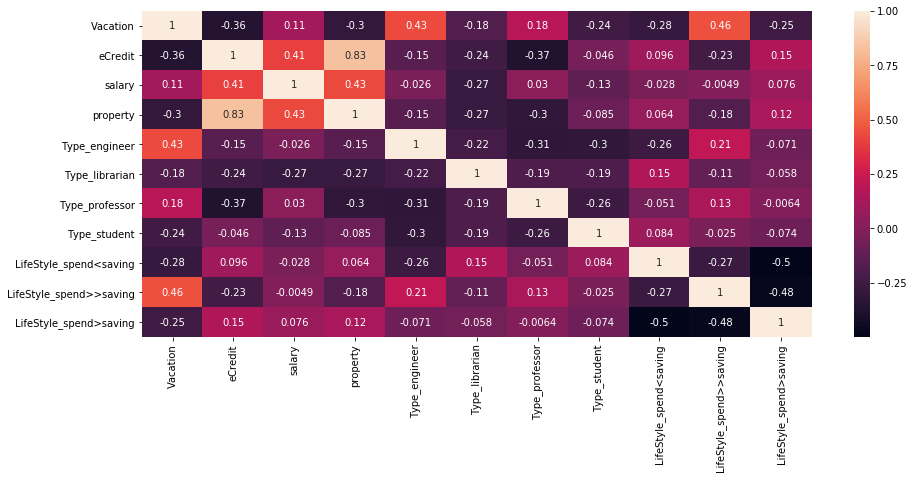

In [292]:
plt.figure(figsize=(15,6))
sns.heatmap(cor,annot=True)
plt.show()

###### Property and Ecredit Columns are correlated independent variables involved in training the model .To avoid such situations, we remove one of those columns in designing the model

## Remove ecredit and check the model

In [293]:
train_copy = train_Final.copy()
test_copy = test_Final.copy()

In [294]:
train_copy = train_copy.drop('property',axis=1)

In [295]:
test_copy = test_copy.drop('property',axis=1)

In [296]:
trainDF = train_Final
testDF = test_Final

In [297]:
l=[]
val=[]
for i in range(3,80,2):
    l.append(knn(i))
    val.append(i)

Accuracy: 28.57142857142857%for k: 3
Accuracy: 28.57142857142857%for k: 5
Accuracy: 28.57142857142857%for k: 7
Accuracy: 23.809523809523807%for k: 9
Accuracy: 23.809523809523807%for k: 11
Accuracy: 23.809523809523807%for k: 13
Accuracy: 28.57142857142857%for k: 15
Accuracy: 28.57142857142857%for k: 17
Accuracy: 23.809523809523807%for k: 19
Accuracy: 23.809523809523807%for k: 21
Accuracy: 19.047619047619047%for k: 23
Accuracy: 19.047619047619047%for k: 25
Accuracy: 23.809523809523807%for k: 27
Accuracy: 19.047619047619047%for k: 29
Accuracy: 19.047619047619047%for k: 31
Accuracy: 19.047619047619047%for k: 33
Accuracy: 14.285714285714285%for k: 35
Accuracy: 14.285714285714285%for k: 37
Accuracy: 19.047619047619047%for k: 39
Accuracy: 23.809523809523807%for k: 41
Accuracy: 19.047619047619047%for k: 43
Accuracy: 19.047619047619047%for k: 45
Accuracy: 19.047619047619047%for k: 47
Accuracy: 19.047619047619047%for k: 49
Accuracy: 14.285714285714285%for k: 51
Accuracy: 19.047619047619047%for k

## Remove property and check the model

In [298]:
train_copy = train_Final.copy()
test_copy = test_Final.copy()

In [299]:
train_copy = train_copy.drop('property',axis=1)

In [300]:
test_copy = test_copy.drop('property',axis=1)

In [301]:
trainDF = train_Final
testDF = test_Final

In [302]:
l=[]
val=[]
for i in range(3,80,2):
    l.append(knn(i))
    val.append(i)

Accuracy: 28.57142857142857%for k: 3
Accuracy: 28.57142857142857%for k: 5
Accuracy: 28.57142857142857%for k: 7
Accuracy: 23.809523809523807%for k: 9
Accuracy: 23.809523809523807%for k: 11
Accuracy: 23.809523809523807%for k: 13
Accuracy: 28.57142857142857%for k: 15
Accuracy: 28.57142857142857%for k: 17
Accuracy: 23.809523809523807%for k: 19
Accuracy: 23.809523809523807%for k: 21
Accuracy: 19.047619047619047%for k: 23
Accuracy: 19.047619047619047%for k: 25
Accuracy: 23.809523809523807%for k: 27
Accuracy: 19.047619047619047%for k: 29
Accuracy: 19.047619047619047%for k: 31
Accuracy: 19.047619047619047%for k: 33
Accuracy: 14.285714285714285%for k: 35
Accuracy: 14.285714285714285%for k: 37
Accuracy: 19.047619047619047%for k: 39
Accuracy: 23.809523809523807%for k: 41
Accuracy: 19.047619047619047%for k: 43
Accuracy: 19.047619047619047%for k: 45
Accuracy: 19.047619047619047%for k: 47
Accuracy: 19.047619047619047%for k: 49
Accuracy: 14.285714285714285%for k: 51
Accuracy: 19.047619047619047%for k

In [281]:
max(l)

28.57142857142857

In [282]:
val[l.index(max(l))]

3